# Chapter 3 - 벡터 응용: 데이터 분석에서의 벡터

In [67]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

## 상관관계 연습 문제

### 3-1. 두 벡터를 입력으로 받아 두 개의 수를 출력하는 파이썬 함수 작성
- 두 개의 수 : 피어슨 상관계수, 코사인 유사도

In [86]:
def pearson_cosine(vec1, vec2):
    # 피어슨 상관계수를 구하기 위해 각 변수를 평균 중심화한다
    vec1_mc = vec1 - np.mean(vec1)
    vec2_mc = vec2 - np.mean(vec2)
    mean_centering = np.dot(vec1_mc, vec2_mc)
    
    # pearson 상관계수 구하기
    # 벡터 노름 곱으로 내적을 나눈 것이 분모
    pearson = mean_centering / (np.linalg.norm(vec1_mc) * np.linalg.norm(vec2_mc))

    # cosine 유사도를 구하기 위해, 분자 (내적) 구하기
    dot = np.dot(vec1, vec2)
    # cosine 유사도 구하기
    cosine_similarity = dot / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

    # print("pearson 상관 계수:", pearson)
    # print("cosine 유사도:", cosine_similarity)

    return pearson, cosine_similarity


In [55]:
vec1 = np.array([3, 8, 10, 12])
vec2 = np.array([1, 3, 9, 14])

In [56]:
pearson_cosine(vec1, vec2)

pearson 상관 계수: 0.90921338405622
cosine 유사도: 0.9448748306973088


(0.90921338405622, 0.9448748306973088)

In [57]:
# np.corrcoef로 구한 피어슨 상관계수와 함수로 만든 상관계수 비교
np.corrcoef(vec1, vec2)[0, 1]

0.9092133840562201

In [59]:
# scipy의 코사인 유사도와 비교
# scipy의 cosine 함수는 코사인 유사도가 아니라 거리를 계산하기 때문에, 1에서 거리를 빼줘야 유사도를 구할 수 있다
# 거리 (distance) : 유사도와 대비되는 개념
# 거리가 가깝다 = 유사도가 높다 / 거리가 멀다 = 유사도가 낮다
# https://abluesnake.tistory.com/100
1 - cosine(vec1, vec2)

0.9448748306973088

### 3-2. 상관관계와 코사인 유사도 차이 살펴보기

In [60]:
a = np.array([0, 1, 2, 3])
a-50

array([-50, -49, -48, -47])

In [102]:
var1 = np.array([0, 1, 2, 3])

def diff_pearson_cosine(var1):

    offsets = range(-50, 51)

    # 각 offset 마다 구하는 pearson 상관 계수와 cosine 유사도를 담을 빈 리스트 생성
    pearsons = []
    cosines = []

    for offset in offsets:
        var2 = var1 + offset
        
        # 연습문제 3-1에서 사용한 pearson_cosine 함수 활용
        pearson, cosine = pearson_cosine(var1, var2)

        pearsons.append(pearson)
        cosines.append(cosine)
        
    # pearson 함수를 통해 구한 피어슨 상관계수, 코사인 유사도 시각화
    plt.figure(figsize=(8, 5))
    plt.plot(offsets, pearsons, marker="o", color="k", label="피어슨")
    plt.plot(offsets, cosines, marker="s", color="r", label="코사인 유사도")

    plt.xlabel("평균 오프셋")
    plt.ylabel("r 또는 c")
    plt.grid()
    
    # 범례 추가
    plt.legend()

    plt.show()

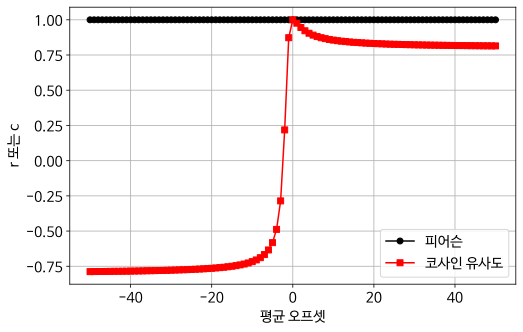

In [103]:
diff_pearson_cosine(var1)